→ VERİ SETİNİN HİKAYESİ←
Veri setimizin, şarapların üretildiği şaraphaneler, şarap türleri (variety), fiyatlar, puanlar ve coğrafi bilgiler gibi çeşitli özellikleri içeriyor. Bu veri seti, şarap endüstrisinin dinamiklerini anlamak, şarapların hangi bölgelerde ve hangi üreticiler tarafından üretildiğini, tüketicilerin hangi tür şarapları daha çok tercih ettiğini, bu şarapların fiyatlarının ve puanlarının nasıl değiştiğini analiz etmek için oldukça değerli bir kaynak sunuyor. Veri seti, şarap fiyatları ile puanlar arasındaki ilişkiyi, şarap türlerinin hangi bölgelerde yoğunlaştığını ve belirli şaraphanelerin üretim çeşitliliğini anlamak için kullanılabilir. Özellikle, şarap türleri ve fiyatları gibi faktörlerin şarapların kalite puanları ile nasıl etkileşimde bulunduğunu, hangi şarap türlerinin en yüksek puanları aldığını ve hangi üreticilerin öne çıktığını keşfetmek, sektöre dair stratejik kararlar almak isteyen şarap üreticileri ve distribütörleri için faydalı olabilir.

Veri setinin amacı, şarap endüstrisinin rekabetçi ortamını ve şarap tüketicilerinin tercihlerinin daha iyi anlaşılmasını sağlamak, böylece şarap üreticilerinin hangi ürünleri sunması gerektiği konusunda bilgi edinmelerine yardımcı olmaktır.

# 0. VERİ SETİNİN HAZIRLANMASI

In [90]:
# Veri setimizin analizi için gerekli olan kütüphaneleri yüklüyoruz.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


# Diğer örnek görselleştirme kütüphaneleri
# ggplot
# Bokeh
# Plotly

In [91]:
# Veri setini notebook içerisine dahil edelim.

df = pd.read_csv("/kaggle/input/wine-reviews/winemag-data_first150k.csv")


In [92]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

# 1. VERİYE İLK BAKIŞ

In [93]:
# Veri setimizin ilk 5 gözlemini görüntüleyelim.
df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0.0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1.0,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2.0,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3.0,US,"This spent 20 months in 30% new French oak, an...",Reserve,96.0,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4.0,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95.0,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [94]:
# Veri setimizin satır ve sütun sayılarını görelim.
df.shape

(150930, 11)

In [95]:
# Veri setindeki kolonları yazdırır.
print(list(df.columns), '\n')

# len() fonksiyonu ile toplam kolon sayısına erişiyoruz.
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

# Çoğu zaman kullandığımız attribute ve fonksiyonların sonuçlarının hangi tipte veri döndürdüğünü gözlemlemek kod üzerinde hakimiyet kurmak için önemlidir.
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['Unnamed: 0', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety', 'winery'] 

Veri seti içerisinde toplam 11 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



In [96]:
# Veri setimize ait genel bilgileri görelim.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   146435 non-null  float64
 1   country      146391 non-null  object 
 2   description  146445 non-null  object 
 3   designation  102152 non-null  object 
 4   points       146497 non-null  float64
 5   price        133262 non-null  float64
 6   province     146405 non-null  object 
 7   region_1     122108 non-null  object 
 8   region_2     59231 non-null   object 
 9   variety      146475 non-null  object 
 10  winery       146390 non-null  object 
dtypes: float64(3), object(8)
memory usage: 12.7+ MB


In [97]:
# Type fonksiyonu ile veri setimizdeki verilerimizin tipini görelim.
df.dtypes

Unnamed: 0     float64
country         object
description     object
designation     object
points         float64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [98]:
# Kategorik özellikleri ve sayısal özellikleri tutacak iki liste oluşturuluyor
categorical_features = []  # Kategorik özelliklerin listesi
numerical_features = []    # Sayısal özelliklerin listesi

# DataFrame'in her bir sütunu üzerinde döngü yapılıyor
for col in df.columns:
    
    # Eğer sütunun veri tipi "object" (genellikle metin/veri türü) ya da "categorical" ise
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)  # Kategorik sütunu kategori listesine ekle
    else:
        numerical_features.append(col)    # Sayısal sütunu sayısal listesine ekle


In [99]:
categorical_features, numerical_features

(['country',
  'description',
  'designation',
  'province',
  'region_1',
  'region_2',
  'variety',
  'winery'],
 ['Unnamed: 0', 'points', 'price'])

In [100]:
# DataFrame'in her bir sütunu üzerinde döngü yapılıyor
for col in df.columns:
    
    # Eğer sütun, kategorik özellikler listesinde varsa
    if col in categorical_features:
        
        # Bu sütunu pandas Categorical türüne dönüştür
        df[col] = pd.Categorical(df[col])


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Unnamed: 0   146435 non-null  float64 
 1   country      146391 non-null  category
 2   description  146445 non-null  category
 3   designation  102152 non-null  category
 4   points       146497 non-null  float64 
 5   price        133262 non-null  float64 
 6   province     146405 non-null  category
 7   region_1     122108 non-null  category
 8   region_2     59231 non-null   category
 9   variety      146475 non-null  category
 10  winery       146390 non-null  category
dtypes: category(8), float64(3)
memory usage: 10.4 MB


In [102]:
# DataFrame'in istatistiksel özetini almak ve transpozunu almak
df.describe().T  # df.describe() ile sayısal sütunların özetini alıyoruz, .T ise transpoz alarak satır ve sütunları değiştiriyoruz.


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,146435.0,75487.577287,43577.824028,0.0,37748.5,75493.0,113230.5,150929.0
points,146497.0,87.886114,3.220673,80.0,86.0,88.0,90.0,100.0
price,133262.0,33.123569,36.154748,4.0,16.0,24.0,40.0,2300.0


# 2. EKSİK VERİ ANALİZİ- EKSİK VERİ İLE BAŞA ÇIKMA

In [103]:
# DataFrame'deki her sütundaki eksik (NaN) değerlerin sayısını toplamını gözlemleyelim.
df.isna().sum() 

Unnamed: 0      4495
country         4539
description     4485
designation    48778
points          4433
price          17668
province        4525
region_1       28822
region_2       91699
variety         4455
winery          4540
dtype: int64

In [104]:
# DataFrame'deki tüm eksik (NaN) değerlerin toplam sayısını hesaplayalım.Eksik olmayan değerlerin sayısını ise notnull() fonksiyonu ile görebiliriz.
df.isna().sum().sum()  


218439

In [105]:
# Veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.
df[df.isnull().any(axis = 1)]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,1.0,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
4,4.0,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95.0,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5.0,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95.0,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6.0,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95.0,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7.0,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95.0,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925.0,Italy,Many people feel Fiano represents southern Ita...,NaN,91.0,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926.0,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91.0,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927.0,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91.0,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928.0,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90.0,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


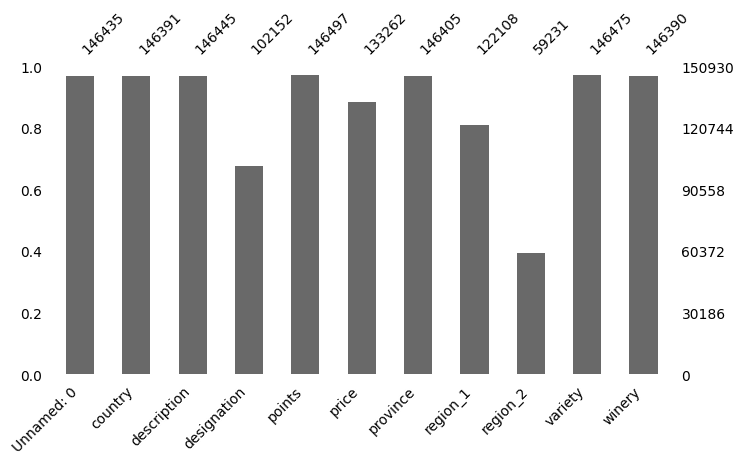

In [106]:
# Eksik verilerin görselleştirilmesi için missingno kütüphanesinin bar grafik fonksiyonunu kullanalım
msno.bar(df = df,        
         figsize = (8, 4),
         fontsize = 10);   

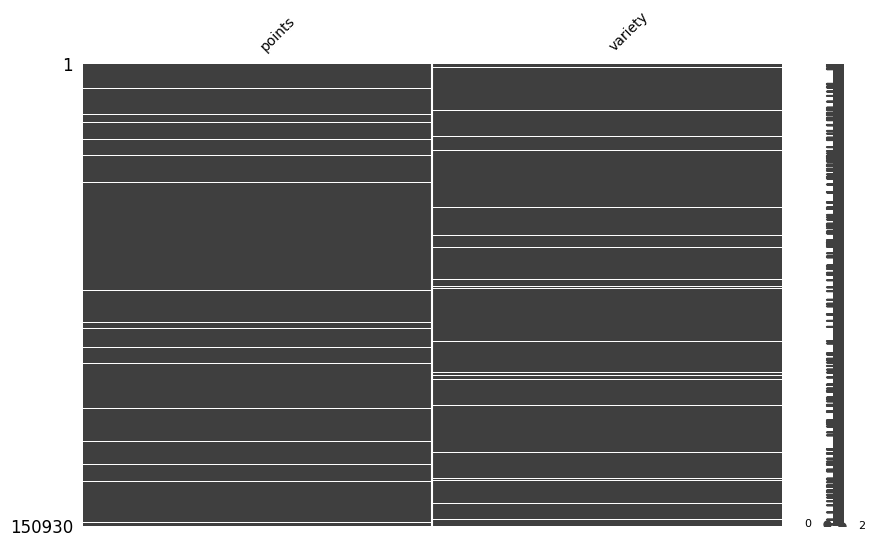

In [107]:
# Eksik verilerin matris şeklinde görselleştirilmesi
msno.matrix(df = df[['points', 'variety']],  
            figsize = (10, 6),                     
            fontsize = 10);                

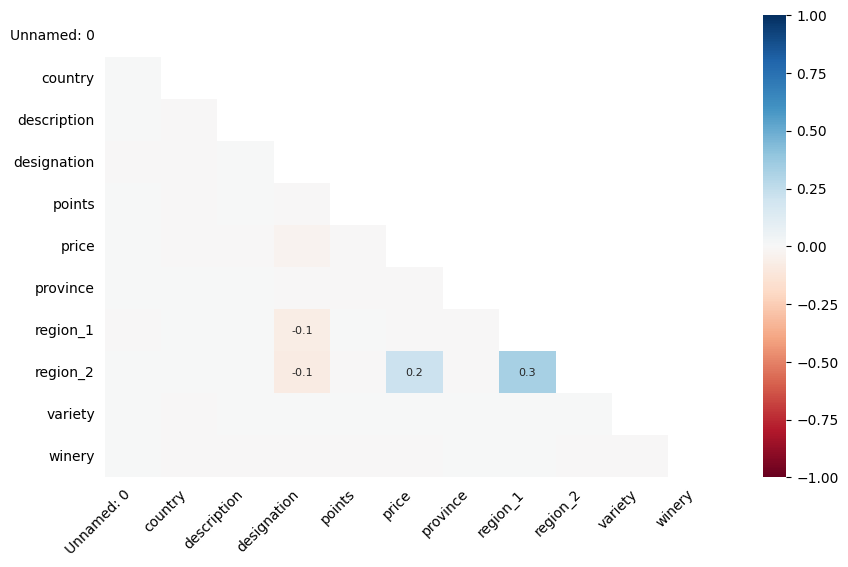

In [108]:
# Eksik verilerin korelasyonlarını görselleştiren bir ısı haritası oluşturulım.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

## 2.1 Eksik Verilerin Silinmesi
Eksik verilerin silinmesi, veri analizinde yaygın bir temizlik işlemidir ve genellikle verinin kalitesini artırmak için yapılır. Ancak, eksik verilerin tamamen silinmesi dikkatlice yapılmalıdır çünkü önemli bilgilerin kaybına yol açabilir. Eksik verilerin bulunduğu satır veya sütunlar, verinin analizine etki etmeyecek kadar azsa veya eksiklikler rastgele dağılmışsa, bu verilerin silinmesi doğru bir yaklaşım olabilir. Ancak, eksik verilerin sayısı çok fazla ise veya bu eksiklikler belirli bir desen gösteriyorsa, bu durum modelin doğruluğunu olumsuz etkileyebilir. Bu nedenle, eksik verilerin silinmesi kararını verirken verinin yapısını ve analiz amacını göz önünde bulundurmak önemlidir.

In [109]:
# DataFrame'deki eksik (NaN) değerler içeren satırları silme ve ilk 5 satırı döndürelim.
df.dropna(inplace = False)[:5]  # df.dropna() eksik değer içeren satırları siler, inplace=False ile yeni bir DataFrame döndürür


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0.0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,2.0,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3.0,US,"This spent 20 months in 30% new French oak, an...",Reserve,96.0,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,8.0,US,This re-named vineyard was formerly bottled as...,Silice,95.0,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9.0,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95.0,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [110]:
# Sadece bütün değerleri eksik olan bir gözlemi silmek istersek;
df.dropna(how = 'all')[:5]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0.0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1.0,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2.0,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3.0,US,"This spent 20 months in 30% new French oak, an...",Reserve,96.0,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4.0,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95.0,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [111]:
# Değişken bazında silmek için;
df.dropna(axis = 1)

""
0
1
2
3
4
...
150925
150926
150927
150928


## 2.2 Eksik Verilerin Doldurulması 
Eksik verilerin doldurulması, veri analizinde eksik (NaN) değerleri yerine uygun bir değer yerleştirme işlemidir. Bu, verinin kaybolan kısımlarını tamamlayarak analiz sürecinde daha fazla bilgi kaybı olmasını engeller. Doldurma işlemi, eksik verilerin türüne ve veri setinin özelliklerine bağlı olarak farklı yöntemlerle yapılabilir. Yaygın yöntemler arasında ortalama, medyan, en yaygın değer veya regresyon gibi istatistiksel yaklaşımlar bulunur. Ayrıca, bazı durumlarda daha gelişmiş yöntemler, örneğin K-en yakın komşu (KNN) veya makine öğrenmesi modelleri kullanılarak eksik veriler tahmin edilebilir.

In [112]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturuyorum.
df_fillna = df.copy()

df_fillna.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0.0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1.0,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2.0,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3.0,US,"This spent 20 months in 30% new French oak, an...",Reserve,96.0,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4.0,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95.0,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [113]:
df_fillna.isna().sum()

Unnamed: 0      4495
country         4539
description     4485
designation    48778
points          4433
price          17668
province        4525
region_1       28822
region_2       91699
variety         4455
winery          4540
dtype: int64

2.2.1 Eksik olan numerik değişkenleri doldurmakla başlayalım.

In [114]:
# Numerik bir değişkenin mean değeriyle doldurulması
mean_points = df_fillna['points'].mean()

df_fillna['points'].fillna(value = mean_points, inplace = True)

df_fillna.isna().sum()

/tmp/ipykernel_30/3573217299.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['points'].fillna(value = mean_points, inplace = True)


Unnamed: 0      4495
country         4539
description     4485
designation    48778
points             0
price          17668
province        4525
region_1       28822
region_2       91699
variety         4455
winery          4540
dtype: int64

In [115]:
# Doldurma işleminin döngüyle yapılması
to_be_filled = numerical_features[1:]

for col in to_be_filled:
    df_fillna[col].fillna(df[col].mean(), inplace = True)

/tmp/ipykernel_30/2093098731.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna[col].fillna(df[col].mean(), inplace = True)


In [116]:
df_fillna.isna().sum()

Unnamed: 0      4495
country         4539
description     4485
designation    48778
points             0
price              0
province        4525
region_1       28822
region_2       91699
variety         4455
winery          4540
dtype: int64

In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,146435.0,75487.577287,43577.824028,0.0,37748.5,75493.0,113230.5,150929.0
points,146497.0,87.886114,3.220673,80.0,86.0,88.0,90.0,100.0
price,133262.0,33.123569,36.154748,4.0,16.0,24.0,40.0,2300.0


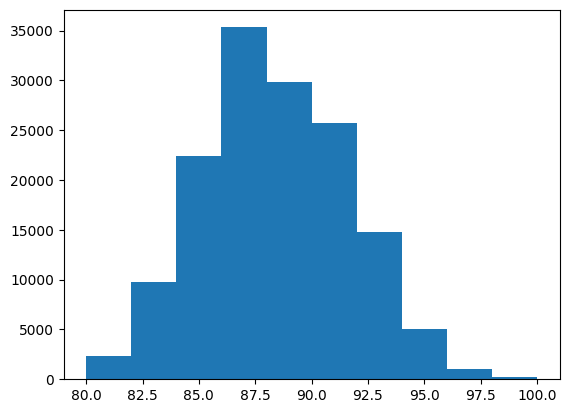

In [118]:
# Bir sayısal değişkenin dağılımını görmek için histogram kullanabiliriz.
plt.hist(df['points'])
plt.show()

2.2.2 Kategorik değişkenleri doldurmakla devam edelim.

In [119]:
# Kategorik bir değişkenin mode değeriyle doldurulması

# variety değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['variety'].isna().sum()

# variety değişkeninde en çok tekrar eden değeri(mode) alalım.
variety_mode = df_fillna['variety'].mode()

# variety değişkenini mode değeri ile dolduralım.
df_fillna['variety'] = df_fillna['variety'].fillna(value = variety_mode[0])

# variety değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
df_fillna.isna().sum()

Unnamed: 0      4495
country         4539
description     4485
designation    48778
points             0
price              0
province        4525
region_1       28822
region_2       91699
variety            0
winery          4540
dtype: int64

In [120]:
df_fillna[["designation"]][:10]


,designation
0,Martha's Vineyard
1,Carodorum Selección Especial Reserva
2,Special Selected Late Harvest
3,Reserve
4,La Brûlade
5,Numanthia
6,San Román
7,Carodorum Único Crianza
8,Silice
9,Gap's Crown Vineyard


In [121]:
# Önceki değer ile doldurma işlemini yapalım. Sonraki değer ile doldurmak istersek de 'ffill' komutunu kullanabiliriz. 
df_fillna["designation"].fillna(method = "bfill")

/tmp/ipykernel_30/1819839086.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fillna["designation"].fillna(method = "bfill")


0                            Martha's Vineyard
1         Carodorum Selección Especial Reserva
2                Special Selected Late Harvest
3                                      Reserve
4                                   La Brûlade
                          ...                 
150925                          Cuvée Prestige
150926                          Cuvée Prestige
150927                           Terre di Dora
150928                         Grand Brut Rosé
150929                                     NaN
Name: designation, Length: 150930, dtype: category
Categories (30259, object): ['"M"', '#50 Mon Chou', '#SocialSecret', ''72', ..., 'ía', 'ía Crianza', 'Župska', '‘Rough Justice' Red']

### 2.2.1 Kategorik Kırılım ile Doldurma İşlemi
Kategorik kırılım ile doldurma işlemi, eksik verilerin (NaN) kategorik değişkenlerin her bir benzersiz değerine göre doldurulmasıdır. Bu yaklaşım, her kategori için belirli bir strateji (örneğin, ortalama, medyan, mod veya başka bir özel değeri) kullanarak eksik verileri tamamlamayı sağlar.

In [122]:
df_categorical_fillna = df.copy()

df_categorical_fillna.isna().sum()

Unnamed: 0      4495
country         4539
description     4485
designation    48778
points          4433
price          17668
province        4525
region_1       28822
region_2       91699
variety         4455
winery          4540
dtype: int64

In [123]:
df_categorical_fillna["price"].fillna(  # "price" sütunundaki eksik değerleri dolduruyoruz
    value = df_categorical_fillna.groupby("variety")["price"]  # "job_title" bazında gruplandırarak "salary" sütununa bakıyoruz
    .transform("mean"), 
    inplace = True  # Değişikliklerin mevcut DataFrame üzerinde yapılmasını sağlıyoruz, yeni bir değişken atamıyoruz
)


/tmp/ipykernel_30/1471516958.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value = df_categorical_fillna.groupby("variety")["price"]  # "job_title" bazında gruplandırarak "salary" sütununa bakıyoruz
/tmp/ipykernel_30/1471516958.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_categorical_fillna["price"].fillna(  # "price" sütu

In [124]:
df_categorical_fillna.isna().sum()

Unnamed: 0      4495
country         4539
description     4485
designation    48778
points          4433
price            581
province        4525
region_1       28822
region_2       91699
variety         4455
winery          4540
dtype: int64

In [125]:
df_categorical_fillna[df_categorical_fillna[["variety", "price"]].isna().all(axis=1)][["variety", "price"]]

,variety,price
121,NaN,NaN
381,NaN,NaN
471,NaN,NaN
793,NaN,NaN
990,NaN,NaN
...,...,...
149695,NaN,NaN
149992,NaN,NaN
150126,NaN,NaN
150267,NaN,NaN


In [126]:
df_categorical_fillna[df_categorical_fillna['price'].isnull()]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
121,121.0,US,This small-quantity selection from within the ...,Charles Vineyard Clone 05,91.0,NaN,California,Anderson Valley,Mendocino/Lake Counties,NaN,Foursight
381,381.0,US,"Made at an attractive price point, this wine d...",Classic Collection,90.0,NaN,California,Napa Valley,Napa,NaN,Napa Cellars
471,471.0,Portugal,"This is a young, fruity wine made for early dr...",Portal da Vinha,86.0,NaN,Alentejano,NaN,NaN,NaN,Companhia das Quintas
793,793.0,US,"Extremely fruity and rich, this stops just sho...",Syzygy,87.0,NaN,California,Livermore Valley,Central Coast,NaN,Entropy Cellars
990,990.0,Italy,Aromas of mature yellow apple and a whiff of c...,NaN,85.0,NaN,NaN,Soave,NaN,NaN,Marcello Turra
...,...,...,...,...,...,...,...,...,...,...,...
149695,149695.0,US,Super-ripe grapes put their shoulder to the wh...,NaN,87.0,NaN,California,Chalk Hill,Sonoma,NaN,Rodney Strong
149992,149992.0,US,"Good, dark color indicates full ripening and t...",NaN,84.0,NaN,California,North Coast,North Coast,NaN,Dunnewood
150126,150126.0,New Zealand,"Tropical and stone-fruity on the nose, with fo...",Morgan Leigh,86.0,NaN,Nelson,NaN,NaN,NaN,Woollaston
150267,150267.0,Germany,"Still a bit sulfury, but otherwise correct, wi...",Wehlener Sonnenuhr Kabinett,85.0,NaN,Mosel-Saar-Ruwer,NaN,NaN,NaN,S.A. Prüm


# 3. KATEGORİK DEĞİŞKEN ANALİZİ

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Unnamed: 0   146435 non-null  float64 
 1   country      146391 non-null  category
 2   description  146445 non-null  category
 3   designation  102152 non-null  category
 4   points       146497 non-null  float64 
 5   price        133262 non-null  float64 
 6   province     146405 non-null  category
 7   region_1     122108 non-null  category
 8   region_2     59231 non-null   category
 9   variety      146475 non-null  category
 10  winery       146390 non-null  category
dtypes: category(8), float64(3)
memory usage: 10.4 MB


In [128]:
# Spesifik bir veri tipi tutan değişkenleri seçmek için select_dtypes() kullanabiliriz.
df_categorical = df.select_dtypes(include = "category")
df_categorical.head(3)

,country,description,designation,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [129]:
# Kategorik bir değişkendeki benzersiz değerleri gözlemlemek için unique() kullanabiliriz. Benzersiz değerlerin sayısını görmek için de nunique() kullanabiliriz.
df_categorical["variety"].unique()

['Cabernet Sauvignon', 'Tinta de Toro', 'Sauvignon Blanc', 'Pinot Noir', 'Provence red blend', ..., 'Huxelrebe', 'Tokay Pinot Gris', 'Chardonnay-Pinot Grigio', 'Moristel', 'Carnelian']
Length: 629
Categories (628, object): ['Agiorgitiko', 'Aglianico', 'Aidani', 'Airen', ..., 'Zinfandel', 'Zlahtina', 'Zweigelt', 'Žilavka']

In [130]:
# Her bir kategorik değişken için toplam gözlem sayısını value_counts() ile buluyoruz.
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

country
US                        60534
Italy                     22772
France                    20482
Spain                      8010
Chile                      5614
Argentina                  5452
Portugal                   5165
Australia                  4794
New Zealand                3227
Austria                    2967
Germany                    2392
South Africa               2190
Greece                      862
Israel                      611
Hungary                     227
Canada                      192
Romania                     131
Slovenia                     91
Uruguay                      90
Croatia                      87
Bulgaria                     76
Moldova                      69
Mexico                       63
Turkey                       50
Georgia                      41
Lebanon                      35
Cyprus                       30
Brazil                       25
Macedonia                    16
Serbia                       13
Morocco                      11


## 3.1 Kategorik Değişkenlerin Görselleştirilmesi

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


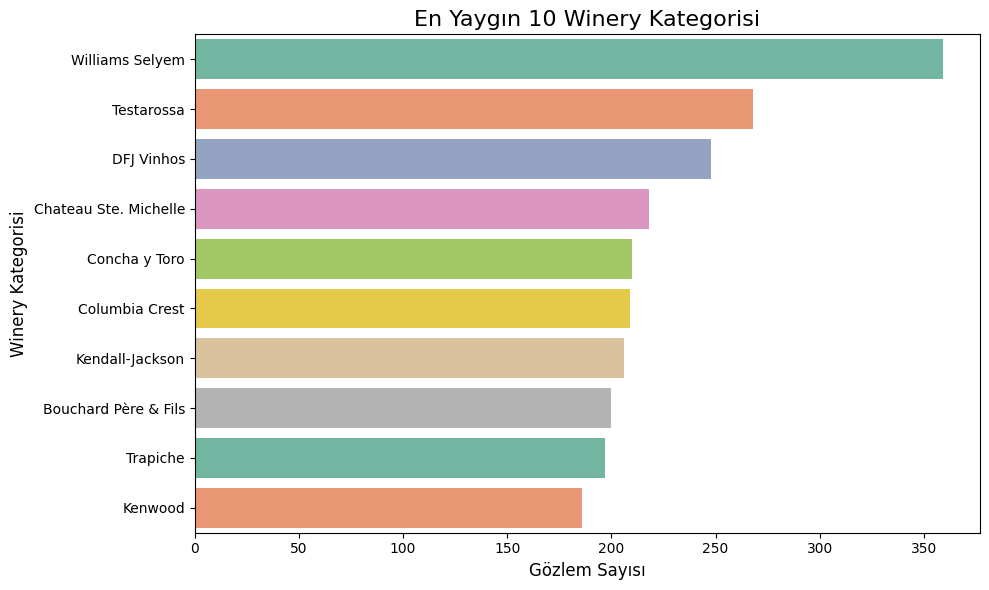

In [131]:
# 'winery' sütunundaki en sık görülen 10 kategoriyi seçiyoruz
top_categories = df['winery'].value_counts().head(10)

# Countplot ile görselleştirme
plt.figure(figsize=(10, 6))
sns.countplot(y='winery', data=df, order=top_categories.index, palette="Set2")

# Grafik başlıkları ve etiketler
plt.title('En Yaygın 10 Winery Kategorisi', fontsize=16)
plt.xlabel('Gözlem Sayısı', fontsize=12)
plt.ylabel('Winery Kategorisi', fontsize=12)

# Grafik gösterimi
plt.tight_layout()
plt.show()

87.0       20169
88.0       17317
90.0       15476
86.0       15160
89.0       12517
85.0       12068
84.0       10388
91.0       10224
92.0        8976
83.0        5877
variety    18325
dtype: int64


<Axes: >

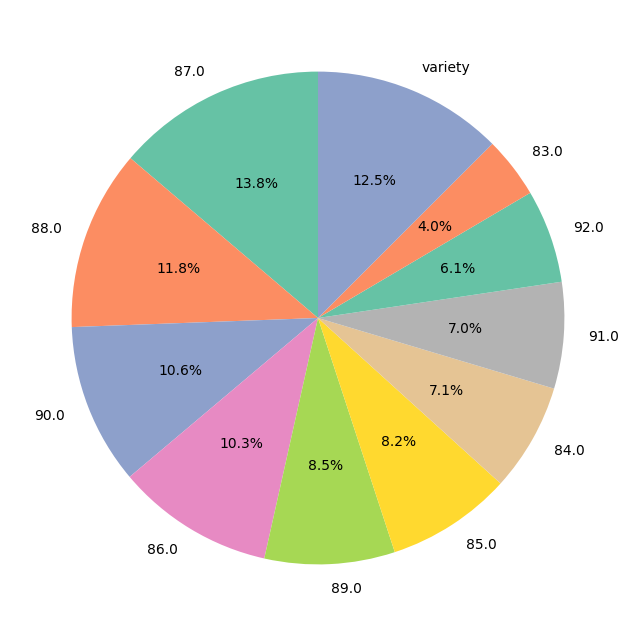

In [132]:

# En büyük 10 kategoriyi seçiyoruz ve diğer kategoriyi oluşturuyoruz
top_categories = df['points'].value_counts().head(10)
other_categories = df['points'].value_counts().iloc[10:].sum()

# Diğer kategoriyi ekliyoruz
top_categories = pd.concat([top_categories, pd.Series({'variety': other_categories})])

# Sonuçları görmek için yazdırabilirsiniz
print(top_categories)
plt.figure(figsize=(8, 8))
top_categories.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(top_categories)))


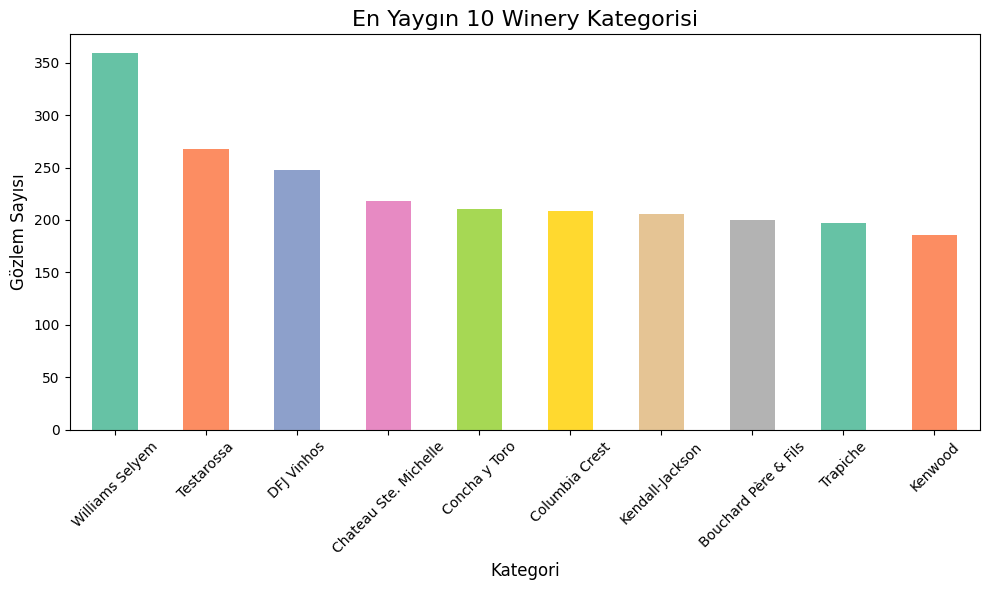

In [133]:
# Kategorilerin sıklıklarını histogram gibi görselleştirme
plt.figure(figsize=(10, 6))
df['winery'].value_counts().head(10).plot(kind='bar', color=sns.color_palette("Set2", 10))

# Grafik başlıkları ve etiketler
plt.title('En Yaygın 10 Winery Kategorisi', fontsize=16)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Gözlem Sayısı', fontsize=12)

# Grafik gösterimi
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3.2 Groupby(Kategorik Gruplama İşlmeleri)
Kategorik gruplama, bir veri setindeki kategorik değişkenlere göre verilerin gruplanması ve her grup için özet bilgiler (örneğin, ortalama, medyan, toplam gibi) çıkarılması işlemidir. Pandas kütüphanesindeki groupby() fonksiyonu, bu tür gruplama işlemlerini kolayca gerçekleştirmenizi sağlar. Kategorik veriler, genellikle birden fazla kategoriye sahip olan ve her birinin belirli özelliklerini temsil eden değişkenlerden oluşur. Bu tür gruplama işlemleri, farklı kategoriler arasındaki farkları analiz etmek ve her kategoriye ait önemli istatistikleri elde etmek için kullanılır.

In [134]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0.0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1.0,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2.0,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3.0,US,"This spent 20 months in 30% new French oak, an...",Reserve,96.0,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4.0,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95.0,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


Soru: Her bölgeye (province) göre şarapların ortalama fiyatları nedir?( Bahsedilen kolonlardaki veri sayımız büyük olduğundan bu görselleştirme işlemini ilk 10 veri için gözlemleyeceğiz)

/tmp/ipykernel_30/793371620.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  province_avg_price = df.groupby('province')['price'].mean().sort_values(ascending=False).head(10)


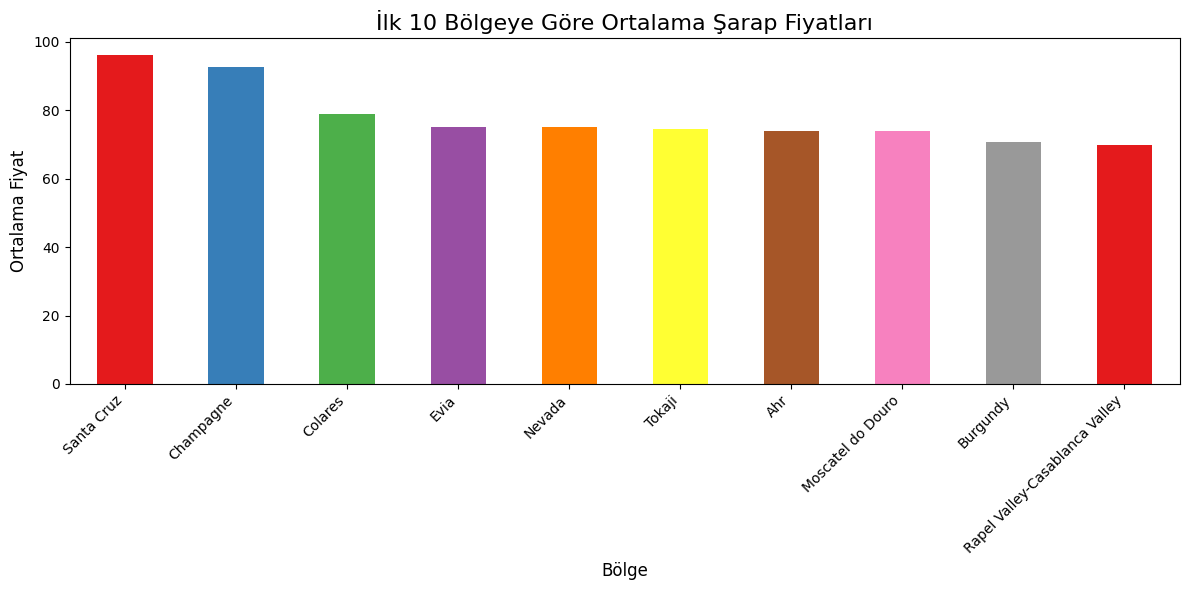

In [135]:
# Bölgeler (province) bazında ortalama fiyatları hesaplayalım ve ilk 10 bölgeyi seçelim
province_avg_price = df.groupby('province')['price'].mean().sort_values(ascending=False).head(10)

# Sonuçları görselleştirelim
plt.figure(figsize=(12, 6))
province_avg_price.plot(kind='bar', color=sns.color_palette("Set1", len(province_avg_price)))
plt.title('İlk 10 Bölgeye Göre Ortalama Şarap Fiyatları', fontsize=16)
plt.xlabel('Bölge', fontsize=12)
plt.ylabel('Ortalama Fiyat', fontsize=12)
plt.xticks(rotation=45, ha='right')  # X eksenindeki etiketleri sağa yaslayarak daha okunabilir hale getirebiliriz
plt.tight_layout()
plt.show()


Soru: Herhangi bir Ülke İçin,şarap türü  Bazında Kaç Kayıt Var?


In [136]:
df_location = df.groupby(by = "country")["variety"].value_counts().to_frame().reset_index().sort_values(by = "count", ascending = False)
df_location_usa = df_location[df_location['country'] == "US"]
df_location_usa

/tmp/ipykernel_30/3264736925.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_location = df.groupby(by = "country")["variety"].value_counts().to_frame().reset_index().sort_values(by = "count", ascending = False)


,country,variety,count
27632,US,Pinot Noir,9744
27633,US,Cabernet Sauvignon,8627
27634,US,Chardonnay,7648
27635,US,Syrah,4028
27636,US,Zinfandel,3593
...,...,...,...
28038,US,Malvazija,0
28037,US,Malvasia-Viura,0
28036,US,Malvasia Nera,0
28035,US,Malvasia Istriana,0


# 4. SÜREKLİ DEĞİŞKEN ANALİZİ

In [137]:
# Veri setindeki numerik kolonları seçmek için aşağıdaki yapıyı kullanabiliriz.
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

,Unnamed: 0,points,price
0,0.0,96.0,235.0
1,1.0,96.0,110.0
2,2.0,96.0,90.0
3,3.0,96.0,65.0
4,4.0,95.0,66.0


In [138]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,146435.0,75487.577287,43577.824028,0.0,37748.5,75493.0,113230.5,150929.0
points,146497.0,87.886114,3.220673,80.0,86.0,88.0,90.0,100.0
price,133262.0,33.123569,36.154748,4.0,16.0,24.0,40.0,2300.0


In [139]:
# Bir veri setindeki numerik kolonların istatistiksel bilgilerine erişmek için basitçe bu tarz bir fonksiyon yazabiliriz.

def give_stats(dataframe: pd.DataFrame) -> None:
    """Prints statistical information for numerical columns.

    Args:
        dataframe (pd.DataFrame): DataFrame object.
    
    Return:
        None
    
    """

    num_df = dataframe.select_dtypes(include = ["float", "int"])

    for col in num_df.columns:
        print(f"**********{col}**********")
        print(f"Mean value of {col} is {num_df[col].mean():.2f}")
        print(f"Std value of {col} is {num_df[col].std():.2f}")
        print(f"Max value of {col} is {num_df[col].max()}")
        print(f"Min value of {col} is {num_df[col].min()}")
        print(f"Count value of {col} is {num_df[col].count()}")
        print(f"Median value of {col} is {num_df[col].median()}\n")

In [140]:
give_stats(dataframe = df)

**********Unnamed: 0**********
Mean value of Unnamed: 0 is 75487.58
Std value of Unnamed: 0 is 43577.82
Max value of Unnamed: 0 is 150929.0
Min value of Unnamed: 0 is 0.0
Count value of Unnamed: 0 is 146435
Median value of Unnamed: 0 is 75493.0

**********points**********
Mean value of points is 87.89
Std value of points is 3.22
Max value of points is 100.0
Min value of points is 80.0
Count value of points is 146497
Median value of points is 88.0

**********price**********
Mean value of price is 33.12
Std value of price is 36.15
Max value of price is 2300.0
Min value of price is 4.0
Count value of price is 133262
Median value of price is 24.0



/tmp/ipykernel_30/864354782.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['points'], shade=True, color='pink')  # 'price' örneği
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


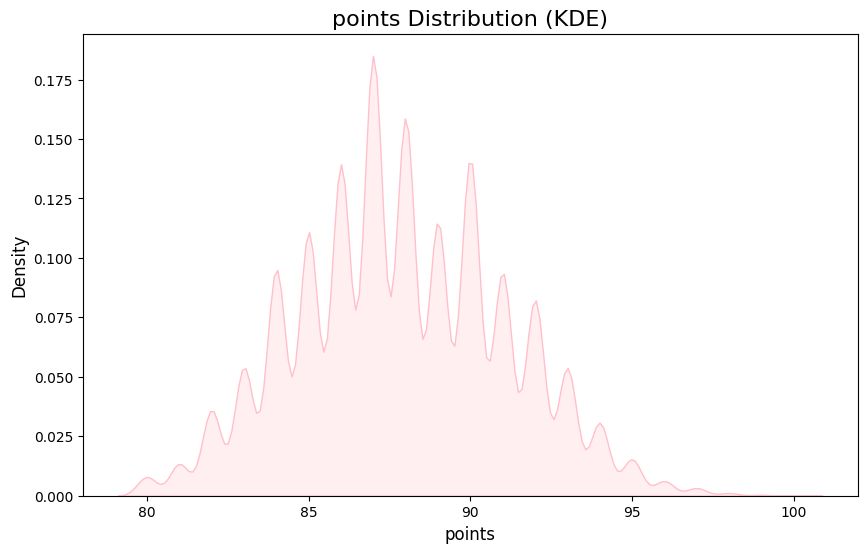

In [141]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['points'], shade=True, color='pink')  # 'price' örneği
plt.title('points Distribution (KDE)', fontsize=16)
plt.xlabel('points', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()


Not: KDE, verinin yumuşatılmış bir yoğunluk tahminini gösterir. Histogramın aksine, KDE veriyi daha düzgün bir şekilde sunar ve sürekli bir eğri oluşturur. Özellikle, büyük veri setlerinde veri dağılımını göstermek için iyi bir yöntemdir.

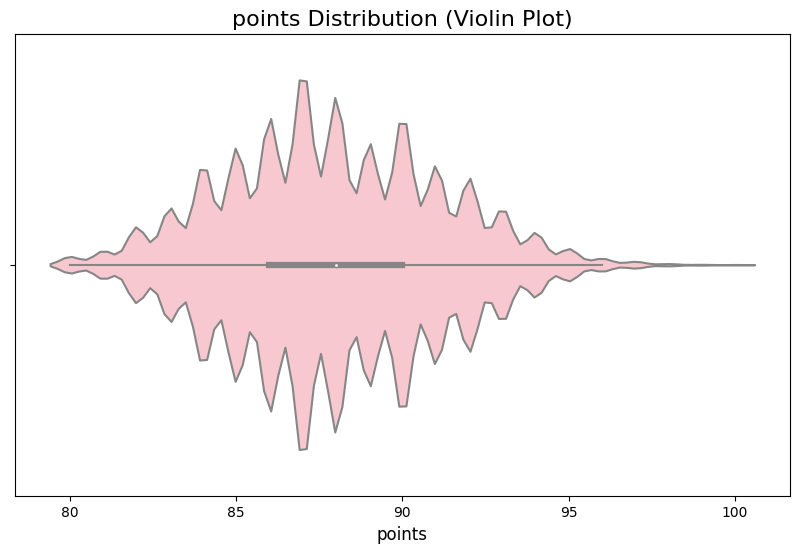

In [142]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['points'], color='pink')
plt.title('points Distribution (Violin Plot)', fontsize=16)
plt.xlabel('points', fontsize=12)
plt.show()


Violin Plot, boxplot ve KDE'nin birleşimidir. Hem verinin dağılımını, hem de yoğunluğunu gösterir. Verinin simetrik dağılımını görmek için çok kullanışlıdır.

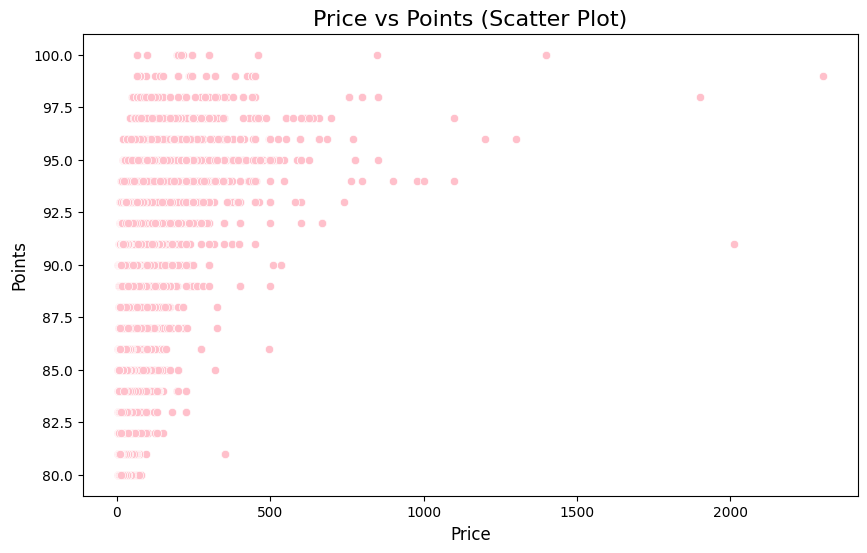

In [143]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['price'], y=df['points'], color='pink')
plt.title('Price vs Points (Scatter Plot)', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.show()

Serpme grafiği, iki veya daha fazla sayısal değişken arasındaki ilişkiyi görselleştirmek için kullanılır. Eğer veri setinde iki sayısal değişken varsa ve bu değişkenler arasındaki ilişkiyi görmek istiyorsak, scatter plot etkili olabilir.


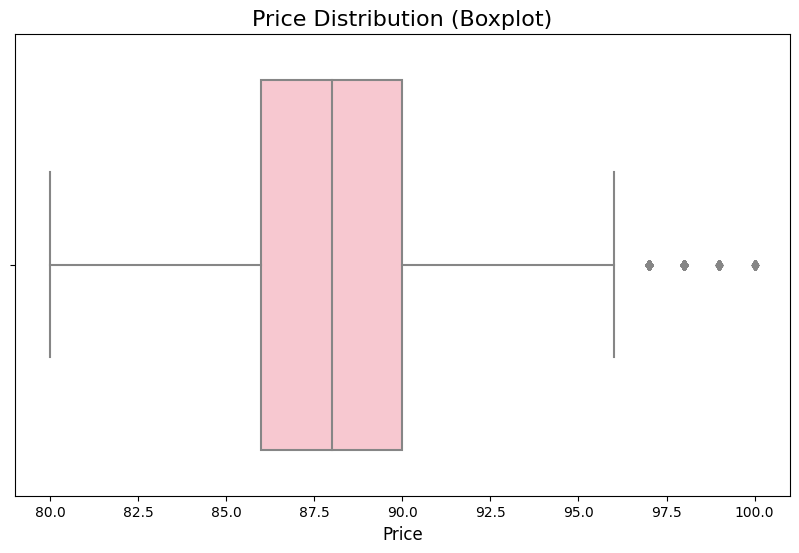

In [144]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['points'], color='pink')
plt.title('Price Distribution (Boxplot)', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.show()


Boxplot, verilerin quartile (çeyrekler) dağılımını gösterir ve özellikle aşırı uç değerler (outliers) ile ilgili bilgi verir. Bu grafik, verinin geneline dair hızlı bir özet sağlar.



/tmp/ipykernel_30/2697234050.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_price = df.groupby('variety')['price'].sum().sort_values(ascending=False).head(10)


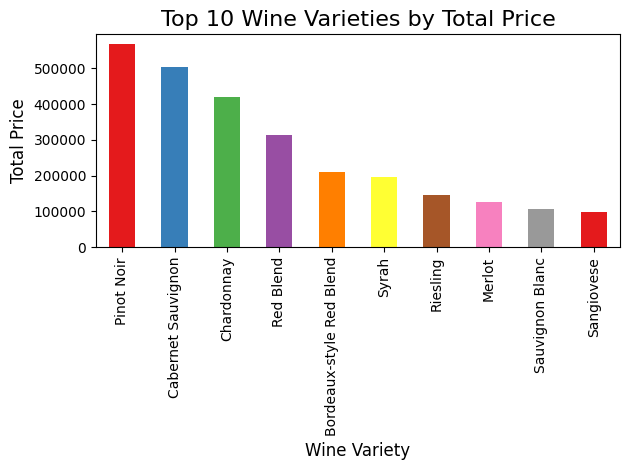

In [145]:
# Her kategoriye göre toplam fiyatı hesaplayalım
category_price = df.groupby('variety')['price'].sum().sort_values(ascending=False).head(10)

# Yığılı çubuk grafik
category_price.plot(kind='bar', stacked=True, color=sns.color_palette("Set1", len(category_price)))
plt.title('Top 10 Wine Varieties by Total Price', fontsize=16)
plt.xlabel('Wine Variety', fontsize=12)
plt.ylabel('Total Price', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Eğer kategorik veriler ve sayısal veriler arasındaki ilişkileri incelemek istiyorsak, yığılı çubuk grafikler (stacked bar plots) kullanabiliriz. Özellikle kategori gruplarının sayılarla nasıl farklılaştığını incelemek için kullanışlıdır.

# 5. AYKIRI DEĞER ANALİZİ
Aykırı Değer Analizi (Outlier Analysis), veri analizi ve istatistiksel modelleme sürecinde önemli bir adımdır çünkü aykırı değerler (outliers), veri setinde bulunan, genel dağılımdan farklılaşan ve bazen hatalı veya anlamlı olmayan değerlerdir. Aykırı değerler, modelin doğruluğunu olumsuz etkileyebilir ve analizlerin güvenilirliğini azaltabilir. Örneğin, bir şarap veri setinde fiyatların genellikle 20-200 dolar arasında olduğu durumda, 5000 dolarlık bir fiyat aykırı bir değer olabilir. Aykırı değerlerin tespiti, genellikle boxplot, z-score, IQR (Interquartile Range) gibi yöntemlerle yapılır. Boxplot, verinin çeyrekler arası yayılımını gösterirken, IQR metodu, verinin çeyrek dilimlerinin dışındaki değerleri aykırı olarak işaretler. Z-score ise her bir değerin ortalamadan ne kadar uzak olduğunu ölçerek, belirli bir eşiği aşan değerleri aykırı olarak kabul eder. Aykırı değerler doğru şekilde tespit edilip işlenmezse, modelin öğrenme sürecinde yanlış sonuçlar doğurabilir; bu yüzden aykırı değer analizi, doğru model ve güvenilir sonuçlar elde etmek için kritik bir adımdır.





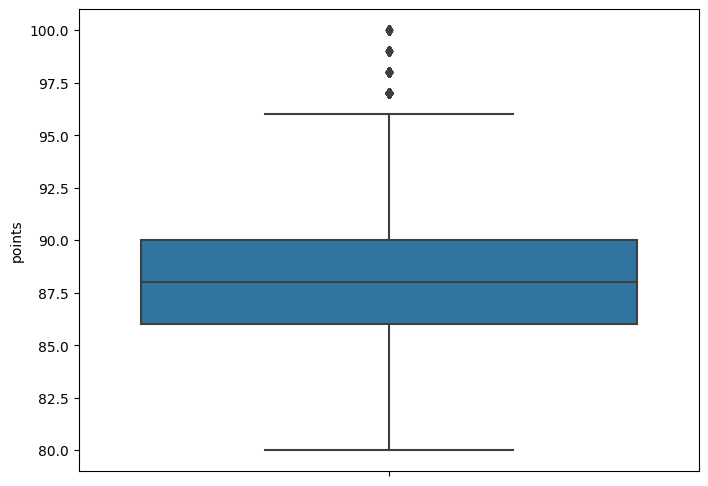

In [146]:
# Bir değişkendeki IQR'a göre aykırı gözlemleri boxplot kullanarak görselleştirelim.
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["points"],
            orient = "v");

In [147]:

# Quantile (çeyreklik) değerlerini hesaplayalım
price_quantiles = df['price'].quantile([0.25, 0.50, 0.75])
points_quantiles = df['points'].quantile([0.25, 0.50, 0.75])

# Çeyreklik değerleri yazdıralım
print("Price Quantiles:")
print(price_quantiles)

print("\nPoints Quantiles:")
print(points_quantiles)


Price Quantiles:
0.25    16.0
0.50    24.0
0.75    40.0
Name: price, dtype: float64

Points Quantiles:
0.25    86.0
0.50    88.0
0.75    90.0
Name: points, dtype: float64


In [148]:
# IQR hesaplama
price_IQR = price_quantiles[0.75] - price_quantiles[0.25]
points_IQR = points_quantiles[0.75] - points_quantiles[0.25]

# Alt ve üst sınırları belirleyelim
price_lower_bound = price_quantiles[0.25] - 1.5 * price_IQR
price_upper_bound = price_quantiles[0.75] + 1.5 * price_IQR

points_lower_bound = points_quantiles[0.25] - 1.5 * points_IQR
points_upper_bound = points_quantiles[0.75] + 1.5 * points_IQR

# Aykırı değerleri filtrele
price_outliers = df[(df['price'] < price_lower_bound) | (df['price'] > price_upper_bound)]
points_outliers = df[(df['points'] < points_lower_bound) | (df['points'] > points_upper_bound)]

# Aykırı değerleri yazdır
print(f"\nAykırı Fiyatlar:\n{price_outliers[['country', 'price']].head()}")
print(f"\nAykırı Puanlar:\n{points_outliers[['country', 'points']].head()}")



Aykırı Fiyatlar:
   country  price
0       US  235.0
1    Spain  110.0
2       US   90.0
7    Spain  110.0
10   Italy   80.0

Aykırı Puanlar:
        country  points
2145     France   100.0
2146      Italy    99.0
2147      Italy    98.0
2148  Australia    98.0
2149         US    98.0


 Fiyatlar arasında, US ve Spain gibi ülkelerden gelen şarapların 90-235 USD arası yüksek fiyatlarla, Italy'den gelen şarapların ise 80 USD civarındaki düşük fiyatlarla aykırı olduğu görülmektedir. Aynı şekilde, puanlar arasında, özellikle France, Italy, Australia ve US'den gelen şarapların 98-100 arasında yüksek puanlar alarak aykırı değerler oluşturduğu belirlenmiştir. 

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


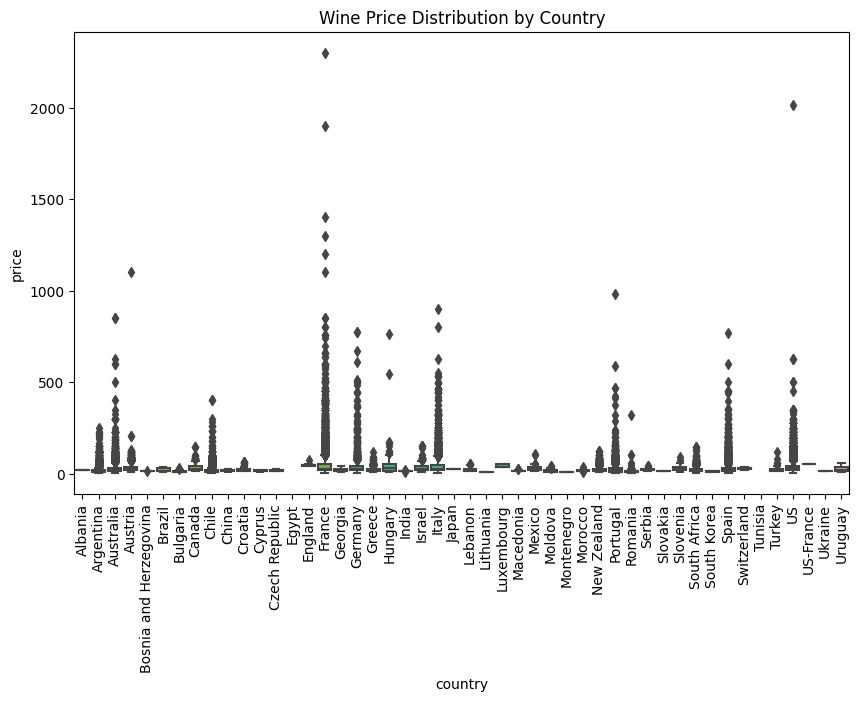

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


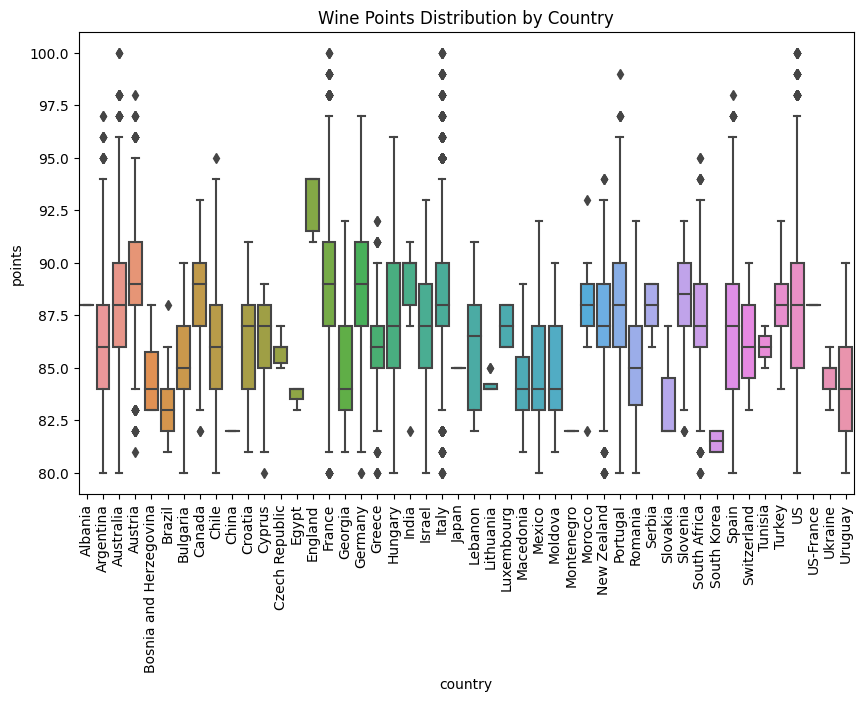

In [149]:

# Fiyatlar için boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='price', data=df)
plt.title('Wine Price Distribution by Country')
plt.xticks(rotation=90)
plt.show()

# Puanlar için boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='points', data=df)
plt.title('Wine Points Distribution by Country')
plt.xticks(rotation=90)
plt.show()


## 5.1 Aykırı Değer Silme

In [150]:
# Aykırı değerleri filtrele ve veri setinden çıkar
df_cleaned = df[(df['price'] >= price_lower_bound) & (df['price'] <= price_upper_bound) &
                (df['points'] >= points_lower_bound) & (df['points'] <= points_upper_bound)]

# Sonuçları yazdır
print(f"Orijinal veri seti boyutu: {df.shape}")
print(f"Temizlenmiş veri seti boyutu: {df_cleaned.shape}")

Orijinal veri seti boyutu: (150930, 11)
Temizlenmiş veri seti boyutu: (122111, 11)


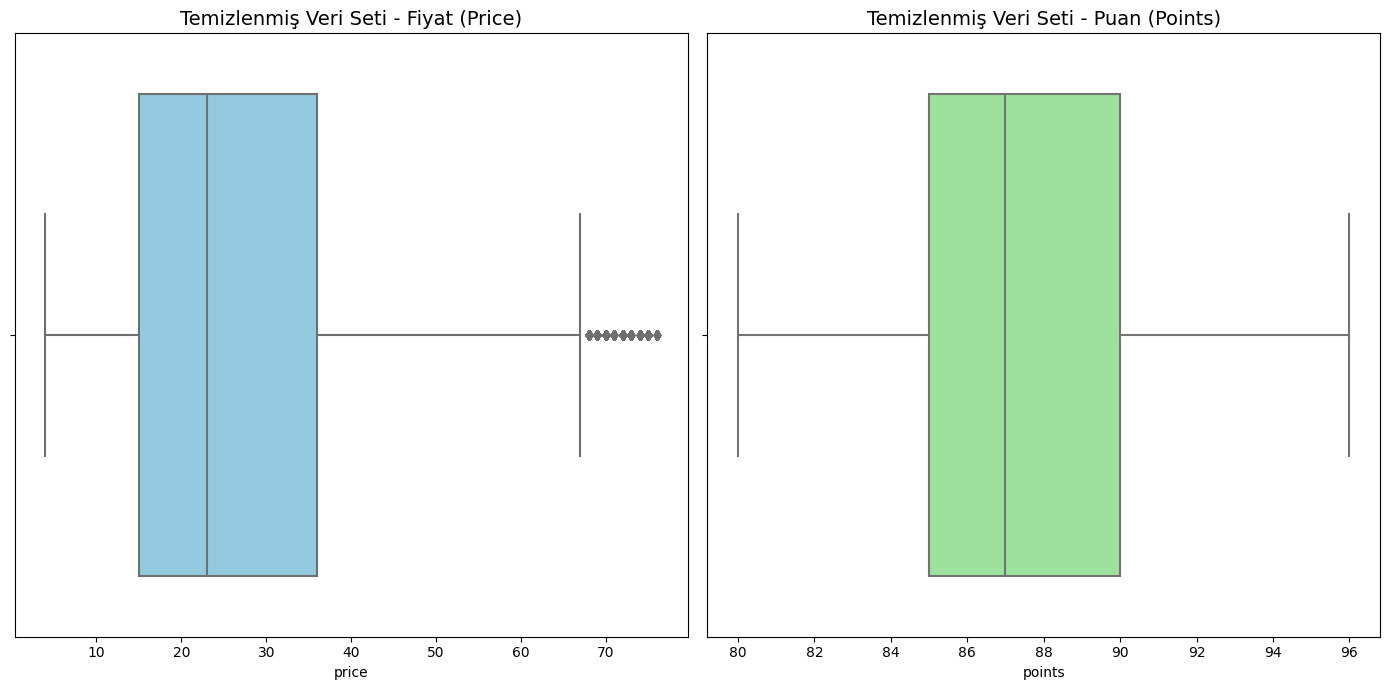

In [151]:
#Temizlenmiş Veri Seti Boxplot'ı
plt.figure(figsize=(14, 7))

# Price Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df_cleaned['price'], color="skyblue")
plt.title('Temizlenmiş Veri Seti - Fiyat (Price)', fontsize=14)

# Points Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['points'], color="lightgreen")
plt.title('Temizlenmiş Veri Seti - Puan (Points)', fontsize=14)

plt.tight_layout()
plt.show()

## 5.2 Aykırı Değerleri Doldurma İşlemi

In [152]:
# Ortalama değeri ile doldurmak için, aykırı değerlerin olduğu indeksleri alıyoruz
price_mean = df['price'].mean()
points_mean = df['points'].mean()

# Aykırı değerleri ortalama ile doldur
df['price'] = df['price'].apply(lambda x: price_mean if x < price_lower_bound or x > price_upper_bound else x)
df['points'] = df['points'].apply(lambda x: points_mean if x < points_lower_bound or x > points_upper_bound else x)

# Doldurulmuş veri setini kontrol et
print("Doldurulmuş veri seti:\n", df[['price', 'points']].describe())

Doldurulmuş veri seti:
                price         points
count  133262.000000  146497.000000
mean       27.718221      87.850470
std        15.316051       3.166315
min         4.000000      80.000000
25%        16.000000      86.000000
50%        24.000000      88.000000
75%        35.000000      90.000000
max        76.000000      96.000000


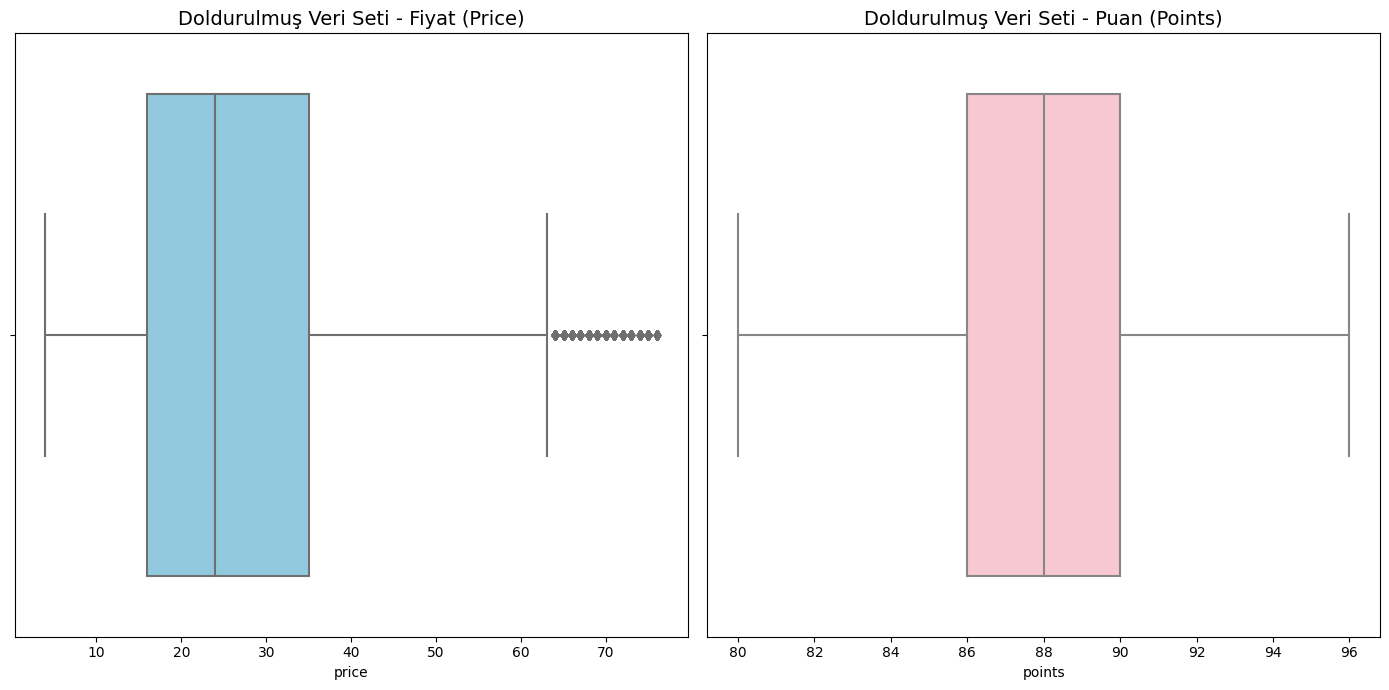

In [153]:
#Doldurulmuş Veri Seti Boxplot'ı
plt.figure(figsize=(14, 7))

# Price Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'], color="skyblue")
plt.title('Doldurulmuş Veri Seti - Fiyat (Price)', fontsize=14)

# Points Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['points'], color="pink")
plt.title('Doldurulmuş Veri Seti - Puan (Points)', fontsize=14)

plt.tight_layout()
plt.show()

# 6. FEATURE ENGİNEERİNG

Feature Engineering, makine öğrenimi ve veri analizindeki en kritik adımlardan biridir. Bu süreç, ham verileri modelleme için daha anlamlı, faydalı ve etkili özellikler (özellikler veya "features") haline getirmeyi amaçlar. Temelde, bir veri setindeki ham verilerin analiz veya tahmin modelleri için uygun hale getirilmesi işlemidir. Feature engineering, kategorik değişkenlerin sayısal verilere dönüştürülmesi (örneğin, one-hot encoding veya label encoding), eksik verilerin doldurulması, yeni türevsel değişkenlerin oluşturulması (örneğin, tarihsel verilere dayalı olarak "yaş" hesaplanması), verinin normalizasyonu veya standardizasyonu gibi bir dizi işlemi kapsar. Ayrıca, doğrusal olmayan ilişkilerin ortaya çıkarılması veya aşırı değerlerin (outliers) düzeltilmesi gibi adımlar da bu sürece dahil olabilir. Başarılı bir feature engineering süreci, modelin performansını büyük ölçüde artırabilir, çünkü doğru ve anlamlı özellikler modelin daha doğru sonuçlar üretmesine yardımcı olur. Bu nedenle, iyi bir feature engineering, veri bilimi ve makine öğrenimi projelerinde başarıya ulaşmanın anahtarıdır.

In [154]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0.0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96.0,33.123569,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1.0,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96.0,33.123569,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2.0,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96.0,33.123569,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3.0,US,"This spent 20 months in 30% new French oak, an...",Reserve,96.0,65.000000,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4.0,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95.0,66.000000,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


  country             variety  points points_segment
0      US  Cabernet Sauvignon    96.0         Yüksek
1   Spain       Tinta de Toro    96.0         Yüksek
2      US     Sauvignon Blanc    96.0         Yüksek
3      US          Pinot Noir    96.0         Yüksek
4  France  Provence red blend    95.0         Yüksek

Segmentlerin Dağılımı:
points_segment
Düşük          49738
Orta Düşük     38028
Yüksek         30738
Orta Yüksek    27993
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


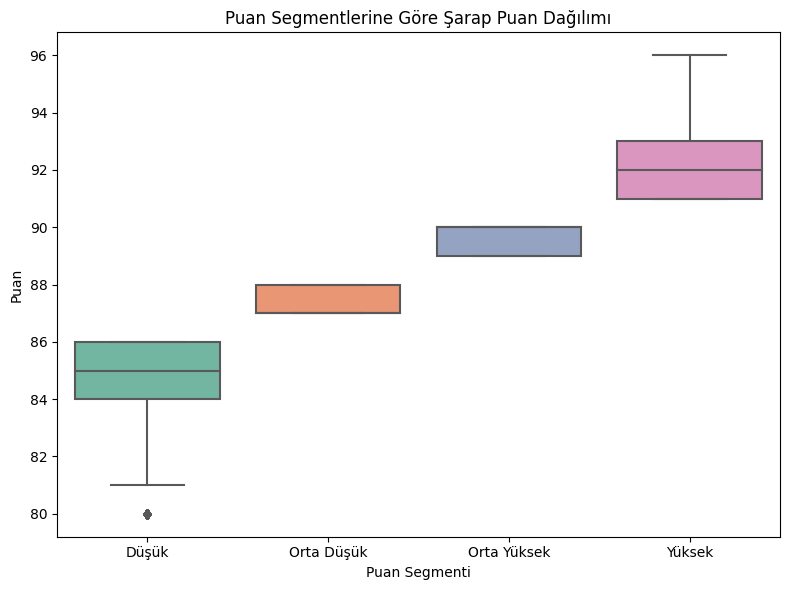

In [155]:

# Verinizin 'df' adlı bir DataFrame olduğunu varsayıyorum
# Şarap puanlarını segmentlere ayıracağız

# 1. Puanların Dağılımına Göre Segmentler Oluştur
# 4 eşit aralıklı segment oluşturacağız: Düşük, Orta Düşük, Orta Yüksek, Yüksek
labels = ['Düşük', 'Orta Düşük', 'Orta Yüksek', 'Yüksek']

# Puanları kuantil bazında 4 gruba ayırıyoruz
df['points_segment'] = pd.qcut(df['points'], q=4, labels=labels)

# 2. Sonuçları Gözlemleyelim
# Şarapların hangi segmentte yer aldığını göstermek için ilk birkaç satır yazdıralım
print(df[['country', 'variety', 'points', 'points_segment']].head())

# 3. Segmentlerin Dağılımını Gösterelim
# Segmentlerin sayısını görmek için value_counts() fonksiyonu ile dağılımı kontrol edebiliriz
print("\nSegmentlerin Dağılımı:")
print(df['points_segment'].value_counts())

# 4. Segmentlerin Ortalamalarını Görselleştirelim
import seaborn as sns
import matplotlib.pyplot as plt

# Şarap puanlarının segmentlere göre ortalamalarını görselleştiriyoruz
plt.figure(figsize=(8, 6))
sns.boxplot(x='points_segment', y='points', data=df, palette='Set2')
plt.title('Puan Segmentlerine Göre Şarap Puan Dağılımı')
plt.xlabel('Puan Segmenti')
plt.ylabel('Puan')
plt.tight_layout()
plt.show()


## 